<a href="https://colab.research.google.com/github/ngotancuong/datamining/blob/main/Logistic_Reg_sklearn_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression example


---

This notebook demonstrates solving a logistic regression problem of predicting Hypothyrodism with **Scikit-learn** and **Statsmodels** libraries.

The dataset is taken from UCI ML repository.
<br>Here is the link: https://archive.ics.uci.edu/ml/datasets/Thyroid+Disease

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import sys
os.chdir('/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/Machine-Learning-with-Python')
sys.path.append("/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/Machine-Learning-with-Python")
!pwd

/content/gdrive/My Drive/Teaching-task/myDM-MLcourse/Machine-Learning-with-Python


### Read the dataset

In [ ]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

In [ ]:
def Convert(string):
  li = list(string.split(" "))
  return li

names = Convert(names)

In [ ]:
names

['response',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [ ]:
#!wget https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/hypothyroid.csv

#!mkdir Data
#!mv hypothyroid.csv Data/

In [ ]:
df = pd.read_csv('./Datasets/hypothyroid.csv',index_col=False,names=names,na_values=['?'])

In [ ]:
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [ ]:
to_drop=[]
for c in df.columns:
    if 'measured' in c or 'query' in c:
        to_drop.append(c)

In [ ]:
to_drop

['query_on_thyroxine',
 'query_hypothyroid',
 'query_hyperthyroid',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [ ]:
to_drop.append('TBG')

In [ ]:
df.drop(to_drop,axis=1,inplace=True)

In [ ]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


### Let us see the basic statistics on the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2717.0,51.154214,19.294405,1.0,35.00,54.00,67.000,98.00
TSH,2695.0,5.923180,23.899467,0.0,0.00,0.70,2.300,530.00
T3,2468.0,1.939749,0.996773,0.0,1.40,1.80,2.300,10.20
TT4,2914.0,108.850000,45.485419,2.0,83.00,104.00,128.000,450.00
T4U,2915.0,0.978199,0.226580,0.0,0.85,0.96,1.065,2.21
FTI,2916.0,115.397771,60.239572,0.0,91.00,107.00,129.000,881.00


### Are any data points are missing? We can check it using `df.isna()` method
The `df.isna()` method gives back a full DataFrame with Boolean values - True for data present, False for missing data. We can use `sum()` on that DataFrame to see and calculate the number of missing values per column.

In [ ]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

### We can use `df.dropna()` method to drop those missing rows

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2000, 16)

### Creating a transformation function to convert `+` or `-` responses to 1 and 0

In [ ]:
def class_convert(response):
    if response=='hypothyroid':
        return 1
    else:
        return 0

In [ ]:
df['response']=df['response'].apply(class_convert)

In [ ]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [ ]:
df.columns

Index(['response', 'age', 'sex', 'on_thyroxine', 'antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

### Exploratory data analysis

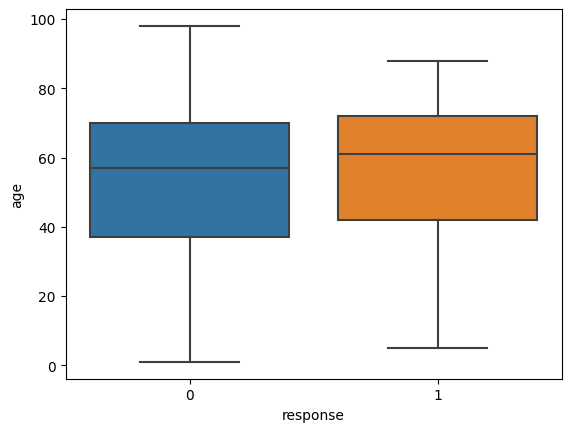

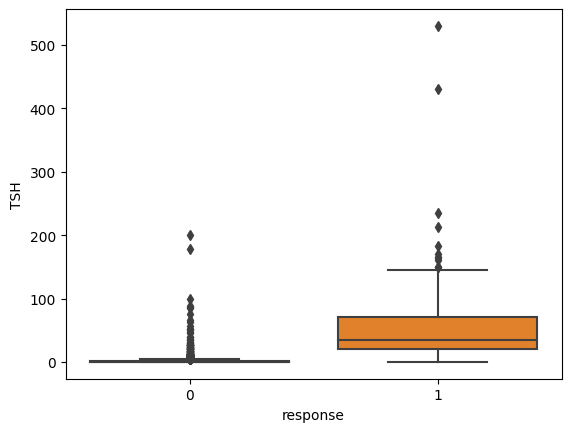

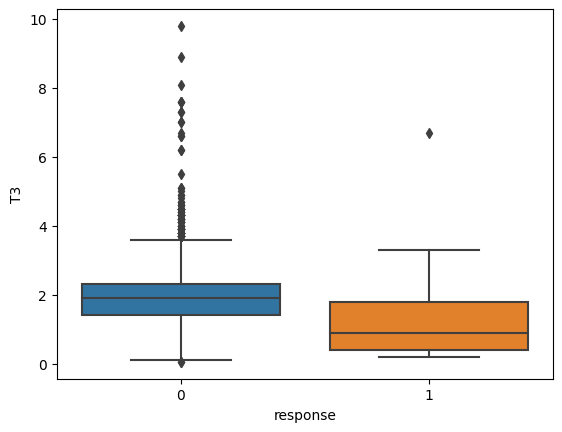

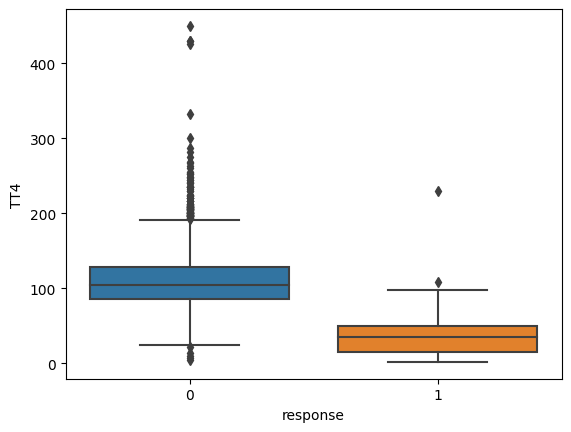

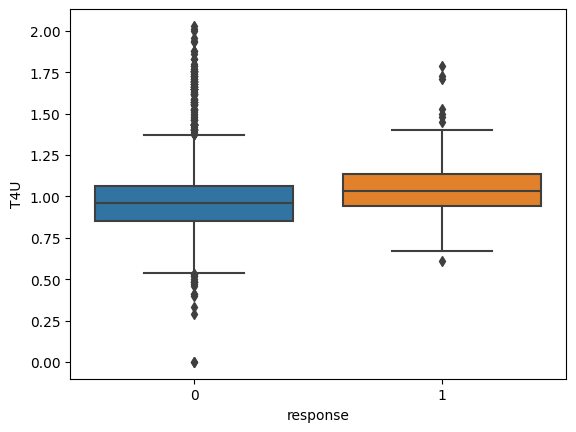

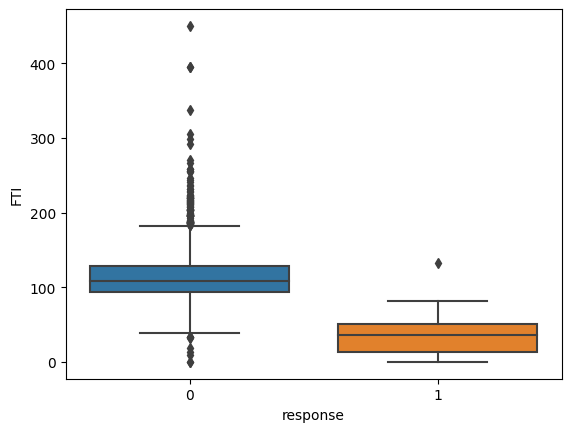

In [ ]:
for var in ['age','TSH','T3','TT4','T4U','FTI']:
    sns.boxplot(x='response',y=var,data=df)
    plt.show()

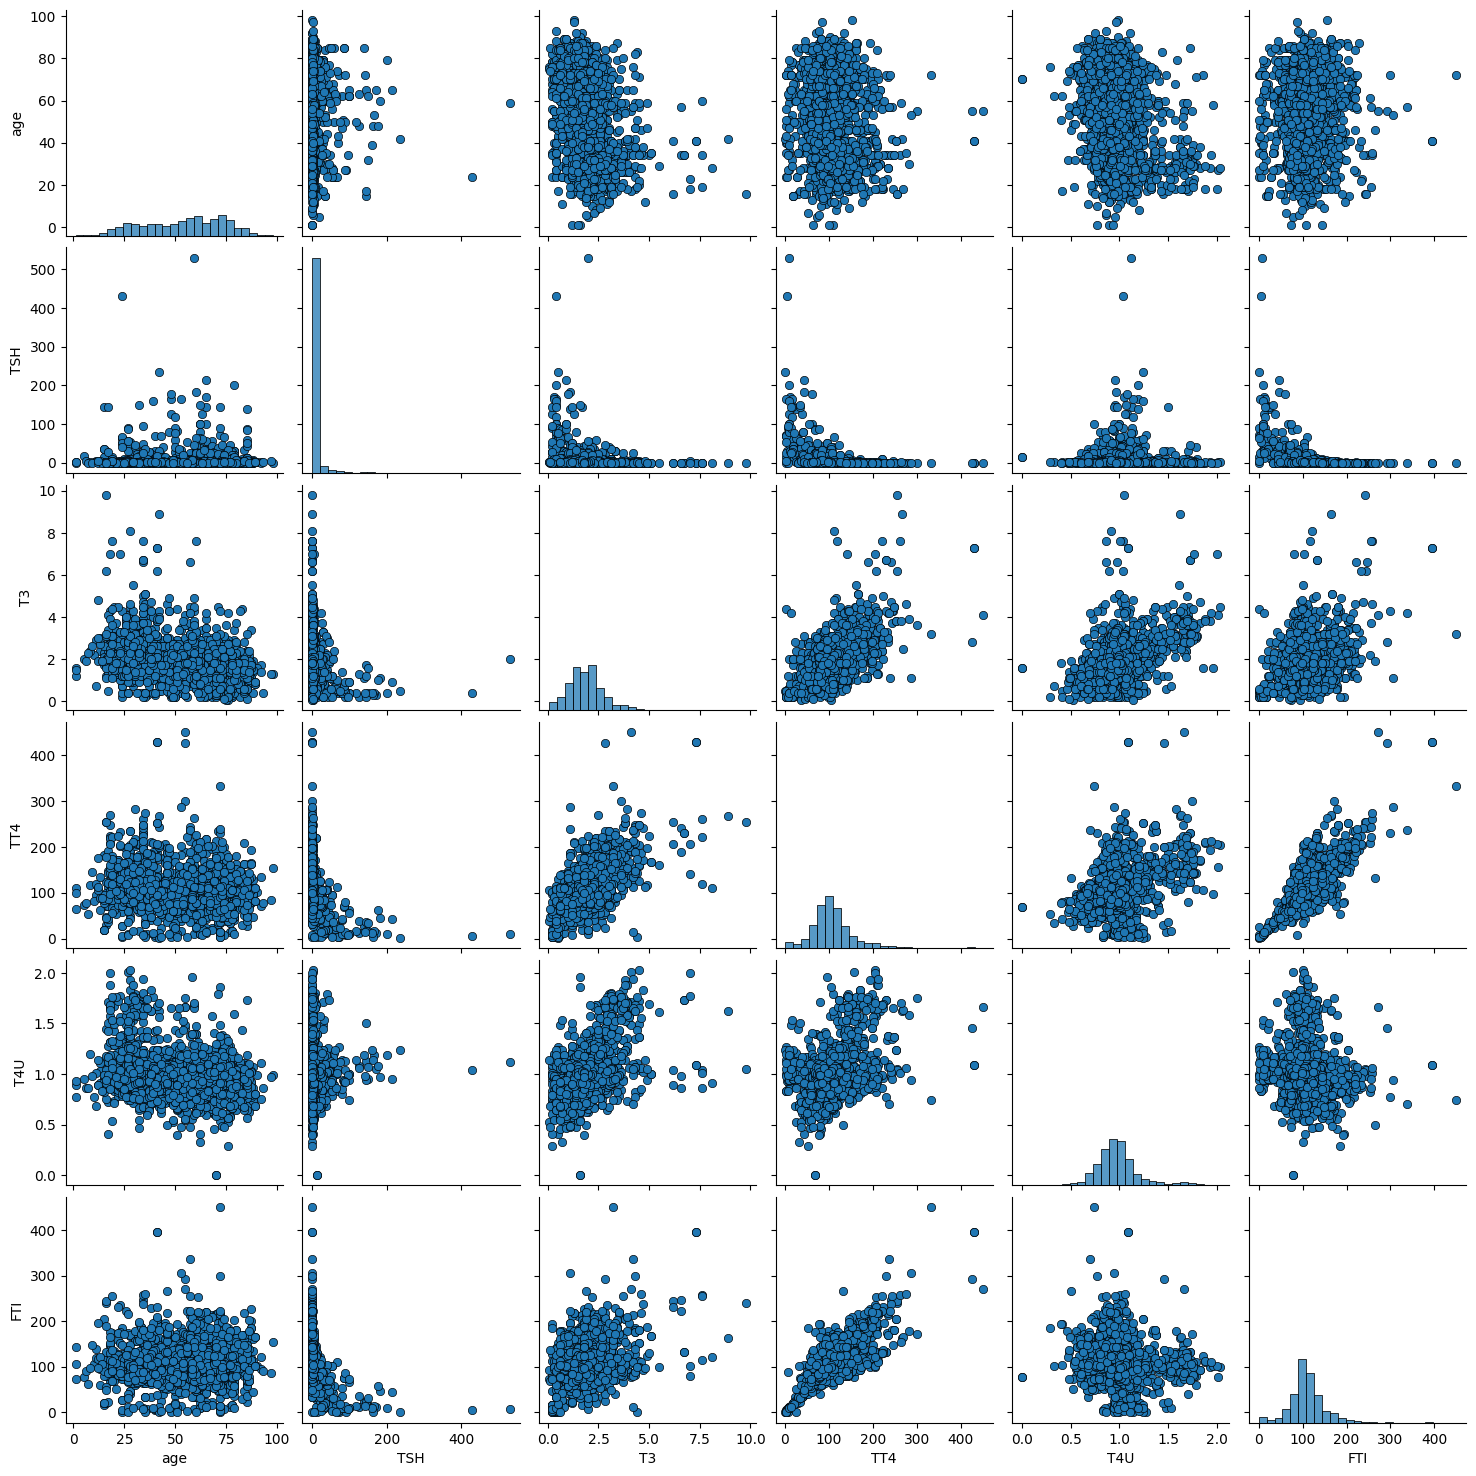

In [ ]:
sns.pairplot(data=df[df.columns[1:]],diag_kws={'edgecolor':'k','bins':25},plot_kws={'edgecolor':'k'})
plt.show()

### Create dummy variables for the categorical variables

In [ ]:
df_dummies = pd.get_dummies(data=df)

In [ ]:
df_dummies.shape

(2000, 25)

In [ ]:
df_dummies.sample(10)

,response,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,tumor_t,lithium_f,lithium_t,goitre_f,goitre_t
476,0,68.0,0.0,2.0,103.0,0.91,113.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
407,0,59.0,0.7,1.6,129.0,1.07,121.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
856,0,62.0,2.6,2.1,79.0,0.89,90.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
857,0,59.0,0.0,2.2,172.0,1.28,134.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1282,0,26.0,0.2,3.9,122.0,1.28,96.0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
1984,0,60.0,12.0,1.7,67.0,0.87,77.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
784,0,69.0,0.0,1.5,71.0,0.60,118.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1129,0,68.0,20.0,2.5,111.0,1.57,71.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1760,0,60.0,0.0,2.2,121.0,1.02,119.0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
2982,0,70.0,0.0,1.2,75.0,1.06,71.0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


### Test/train split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('response',axis=1),
                                                    df_dummies['response'], test_size=0.30,
                                                    random_state=42)

In [ ]:
print("Training set shape",X_train.shape)
print("Test set shape",X_test.shape)

Training set shape (1400, 24)
Test set shape (600, 24)


### Using `LogisticRegression` estimator from Scikit-learn
We are using the L2 regularization by default

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression(penalty='l2',solver='newton-cg')

In [ ]:
clf1.fit(X_train,y_train)

LogisticRegression(solver='newton-cg')

### Intercept, coefficients, and score

In [ ]:
clf1.intercept_

array([2.28503847])

In [ ]:
clf1.coef_

array([[ 0.02031892,  0.01861482, -0.32521621,  0.00395535,  0.30699779,
        -0.10796206,  0.30204717, -0.30203707,  0.89773287, -0.89772277,
         0.62687849, -0.62686839, -0.67442726,  0.67443736,  0.13429158,
        -0.13428148,  0.27313167, -0.27312157,  0.26138878, -0.26137868,
         0.08933173, -0.08932163, -0.24898919,  0.24899929]])

In [ ]:
clf1.score(X_test,y_test)

0.9816666666666667

### For `LogisticRegression` estimator, there is a special `predict_proba` method which computes the raw probability values

In [ ]:
prob_threshold = 0.5

In [ ]:
prob_df=pd.DataFrame(clf1.predict_proba(X_test[:10]),columns=['Prob of NO','Prob of YES'])
prob_df['Decision']=(prob_df['Prob of YES']>prob_threshold).apply(int)
prob_df

,Prob of NO,Prob of YES,Decision
0,0.990471,0.009529,0
1,0.998714,0.001286,0
2,0.999999,0.000001,0
3,0.624016,0.375984,0
4,0.999296,0.000704,0
5,0.864075,0.135925,0
6,0.983696,0.016304,0
7,0.998507,0.001493,0
8,0.221967,0.778033,1
9,0.999968,0.000032,0


In [ ]:
y_test[:10]

2944    0
511     0
2116    0
1412    0
2039    0
2013    0
1478    0
2744    0
83      1
2100    0
Name: response, dtype: int64

### Classification report, and confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.86      0.77      0.81        31

    accuracy                           0.98       600
   macro avg       0.92      0.88      0.90       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
pd.DataFrame(confusion_matrix(y_test, clf1.predict(X_test)),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,565,4
NO,7,24


### Using `statsmodels` library

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
df_dummies.columns

Index(['response', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'antithyroid_medication_f',
       'antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t', 'tumor_f', 'tumor_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t'],
      dtype='object')

### Create a 'formula' in the same style as in R language

In [ ]:
formula = 'response ~ ' + '+'.join(df_dummies.columns[1:])

In [ ]:
formula

'response ~ age+TSH+T3+TT4+T4U+FTI+sex_F+sex_M+on_thyroxine_f+on_thyroxine_t+antithyroid_medication_f+antithyroid_medication_t+thyroid_surgery_f+thyroid_surgery_t+pregnant_f+pregnant_t+sick_f+sick_t+tumor_f+tumor_t+lithium_f+lithium_t+goitre_f+goitre_t'

### Fit a GLM (Generalized Linear model) with this formula and choosing `Binomial` as the family of function

In [ ]:
model = smf.glm(formula = formula, data=df_dummies, family=sm.families.Binomial())

In [ ]:
result=model.fit()

### `summary` method shows a R-style table with all kind of statistical information

In [ ]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1984
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -123.59
Date:                Sat, 09 Sep 2023   Deviance:                       247.17
Time:                        04:26:32   Pearson chi2:                 9.10e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.2853
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

### The `predict` method computes probability for the test dataset

In [ ]:
result.predict(X_test[:10])

2944    2.408353e-03
511     6.250161e-04
2116    6.125699e-07
1412    3.274420e-01
2039    7.888963e-04
2013    1.325293e-01
1478    3.197375e-02
2744    1.098108e-03
83      8.650453e-01
2100    6.524129e-05
dtype: float64

### To create binary predictions, you have to apply a threshold probability and convert the booleans into integers

In [ ]:
y_pred=(result.predict(X_test)>prob_threshold).apply(int)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.89      0.77      0.83        31

    accuracy                           0.98       600
   macro avg       0.94      0.88      0.91       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,566,3
NO,7,24


### A smaller model with only first few variables

We saw that majority of variables in the logistic regression model has p-values very high and therefore they are not statistically significant. We create another smaller model removing those variables.

In [ ]:
formula = 'response ~ ' + '+'.join(df_dummies.columns[1:7])
formula

'response ~ age+TSH+T3+TT4+T4U+FTI'

In [ ]:
model = smf.glm(formula = formula, data=df_dummies, family=sm.families.Binomial())
result=model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               response   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -131.55
Date:                Sat, 09 Sep 2023   Deviance:                       263.09
Time:                        04:26:34   Pearson chi2:                 5.65e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.2795
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1596      1.995      2.085      0.0

In [ ]:
y_pred=(result.predict(X_test)>prob_threshold).apply(int)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       573
           1       0.74      0.85      0.79        27

    accuracy                           0.98       600
   macro avg       0.87      0.92      0.89       600
weighted avg       0.98      0.98      0.98       600



In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_pred),columns=['Predict-YES','Predict-NO'],index=['YES','NO'])

,Predict-YES,Predict-NO
YES,565,4
NO,8,23


### How do the probabilities compare between `Scikit-learn` and `Statsmodels` predictions?

In [ ]:
sklearn_prob = clf1.predict_proba(X_test)[...,1][:10]
statsmodels_prob =  result.predict(X_test[:10])

In [ ]:
prob_comp_df=pd.DataFrame(data={'Scikit-learn Prob':list(sklearn_prob),'Statsmodels Prob':list(statsmodels_prob)})
prob_comp_df

,Scikit-learn Prob,Statsmodels Prob
0,0.009529,0.026742
1,0.001286,0.000780
2,0.000001,0.000001
3,0.375984,0.306287
4,0.000704,0.000797
5,0.135925,0.132377
6,0.016304,0.007412
7,0.001493,0.001065
8,0.778033,0.874865
9,0.000032,0.000161


### Coefficient interpretation

What is the interpretation of the coefficient value for `age` and `FTI`?

- With every one year of age increase, the log odds of the hypothyrodism **increases** by 0.0248 or the odds of hypothyroidsm increases by a factor of exp(0.0248) = 1.025 i.e. almost 2.5%.
- With every one unit of FTI increase, the log odds of the hypothyrodism **decreases** by 0.1307 or the odds of hypothyroidsm decreases by a factor of exp(0.1307) = 1.1396 i.e. almost by 12.25%.